<a href="https://colab.research.google.com/github/miftahudinfaiz/BDDM/blob/main/BD%26DM_week3_Preprocessing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 3 - Data Preprocessing

**[CPMK 22]:** Mahasiswa mampu menerapkan metode pengolahan data

Outline:
**Data Cleaning**:


In [ ]:
#Load Dataset
import pandas as pd

#Cara 1
#klik kanan file dataset kemudian klik copy path
#df = pd.read_csv('/content/titanic.csv')

#Cara 2
url = 'https://drive.google.com/file/d/1MN30aUrowTuUce4dkxejm4fZUkc-EXFi/view?usp=sharing' #link google drive dataset
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Inspection**

In [ ]:
# info() digunakan untuk menampilkan informasi detail tentang dataframe, 
#seperti jumlah baris data, nama-nama kolom berserta jumlah data dan tipe datanya, dan sebagainya.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Tampilkan setiap baris yang memiliki nilai null (NaN) pada kolom apapun
#Gunakan fitur isna() yang disediakan library pandas
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#function any() untuk mengecek nilai NaN berdasarkan kolom
df.isna().any()

In [ ]:
#describe() digunakan untuk menampilkan deskriptif statistik data. 
#Hanya kolom yang bertipe numerik yang akan ditampilkan statistiknya.
df.describe()

In [ ]:
#mencari jumlah baris data yang bernilai null
#terdapat kolom age , cabin, dan embarked memiliki nilai kosong
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**1. Handling Missing value-Ignore tuple**

In [ ]:
#menghapus baris kosong dari embarked dan mereplace data baru ke dataframe
df.dropna(subset=['Embarked'],inplace = True)

In [ ]:
#cek kembali keberadaan nilai kosong
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

:

**2. Handling Missing Value- Fill using attibute mean, median or modus**

In [ ]:
#kolom Age, kita isikan dengan nilai rata-rata dari data yang lain
# Langkah 1: hitung rata-rata dari fitur Age
rata_umur = df['Age'].mean()
# Langkah 2:replace/isikan data mean ke field yang kosong
df['Age'] = df['Age'].fillna(rata_umur)
# Langkah 3
print('Jumlah data null pada kolom Age : ', df['Age'].isna().sum())

Jumlah data null pada kolom Age :  0


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
dtype: int64

In [ ]:
# Langkah 1
modus = df['Cabin'].mode()[0]
print (modus)

B96 B98


In [ ]:
#Buktikan bahwa nilai variabel 'modus' sudah benar-
#dengan melakukan grouping berdasarkan value cabin kemudian menghitungnya


In [ ]:
# Langkah 2
df['Cabin'] = df['Cabin'].fillna(modus)
# Langkah 3
df['Cabin'].isna().sum()

0

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
# menghapus kolom tertentu
#kolom Fare, kita abaikan, maka kita hapus saja kolom dan baris tersebut
print('Kolom Awal : ')
print(df.columns)

df.drop('Fare', axis=1, inplace=True)

print('\n\nKolom Setelah Fare dihapus : ')
print(df.columns)

Kolom Awal : 
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Kolom Setelah Fare dihapus : 
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Cabin', 'Embarked'],
      dtype='object')


#**PENUGASAN**
1. Berikan contoh dataset yang terdapat data pencilan/outlier, Visualisasikan dataset tesebut menggunakan (pilih salah satu)
a. Scatter Plot atau 
b. Box Plot 
2. Buang data pencilan tersebut
3. Visualisasikan lagi setelah data pencilan dibuang dan amati perbedaanya.

Dikumpulkan 1 minggu sejak hari ini dalam format file .ipynb berikut file dataset yang digunakan (.csv)

Penamaan file xxxx.ipynb
xxxx adalah 4 digit terakhir nim Anda

Penamaan file dataset xxxx.csv
xxxx adalah 4 digit terakhir nim Anda



Referensi :

https://ngodingdata.com/python-pandas-cara-menangani-missing-value/

https://ilmudatapy.com/20-function-di-pandas-python-yang-perlu-diketahui-pemula/


###Nama  : Miftahudin Faiz
###NIM   : 20.11.3675
###Kelas : 20-S1-IF-07

#Import

In [218]:
#library
import pandas as pd
import matplotlib.pyplot as plt

In [237]:
#dataset
url= "https://raw.githubusercontent.com/miftahudinfaiz/BDDM/main/weight-height.csv"

#Datasets Insights

In [248]:
#Reading datasets
df = pd.read_csv(url, encoding = "iso-8859-1")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [247]:
#Checking null data count on datasets
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [246]:
#Datasets statistics
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


#Outliers Preprocessing

Using IQR (Inter-Quartile Range) to determine potential outliers

In [222]:
#Calculating IQR (IQR = Q3-Q1)
Height_IQR = df["Height"].quantile(0.75) - df["Height"].quantile(0.25)
Weight_IQR = df["Weight"].quantile(0.75) - df["Weight"].quantile(0.25)
print(f"IQR for Height is: {Height_IQR}\nIQR for Weight is: {Weight_IQR}\n")

#Calculating lower fence (Q1 - 1.5(IQR)) and upper fence (Q3 - 1.5(IQR))
Height_LF = df["Height"].quantile(0.25) - 1.5*Height_IQR
Height_UF = df["Height"].quantile(0.75) + 1.5*Height_IQR
print(f"Lower fence for Height is: {Height_LF}\nUpper fence for Height is: {Height_UF}\n")
Weight_LF = df["Weight"].quantile(0.25) - 1.5*Weight_IQR
Weight_UF = df["Weight"].quantile(0.75) + 1.5*Weight_IQR
print(f"Lower fence for Weight is: {Weight_LF}\nUpper fence for Weight is: {Weight_UF}")

IQR for Height is: 5.668641245615746
IQR for Weight is: 51.35147356318197

Lower fence for Height is: 55.00265861279534
Upper fence for Height is: 77.67722359525831

Lower fence for Weight is: 58.79084096072856
Upper fence for Weight is: 264.19673521345646


Datasets boxplots

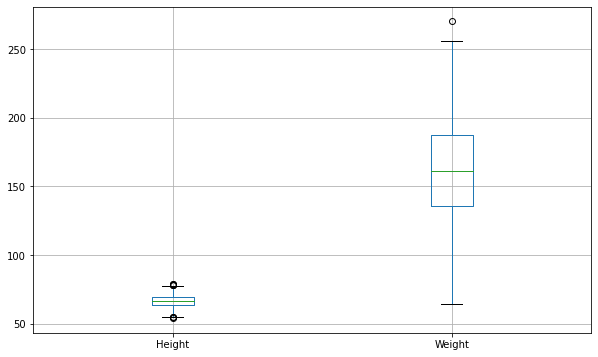

In [254]:
#Datasets boxplots
plt.figure(figsize=(10, 6))
df.boxplot()
plt.show()

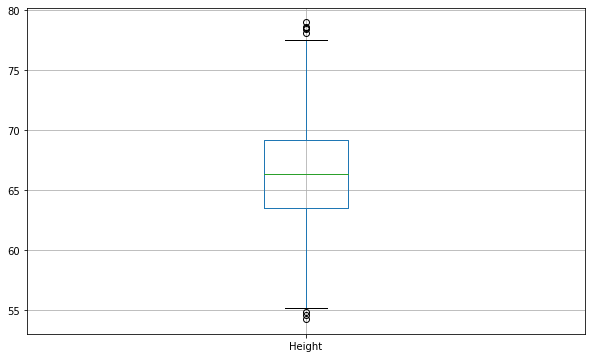

In [239]:
#Height boxplot
plt.figure(figsize=(10, 6))
df.boxplot(["Height"])
plt.show()

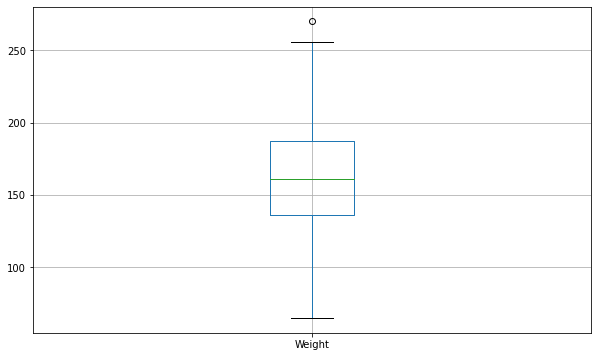

In [240]:
#Weight boxplot
plt.figure(figsize=(10, 6))
df.boxplot(["Weight"])
plt.show()

Outliers data

In [226]:
#Height lower fence data
HLF = df[df["Height"] < Height_LF]
HLF

,Gender,Height,Weight
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [227]:
#Height upper fence data
HUF = df[df["Height"] > Height_UF]
HUF

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783


In [228]:
#Weight lower fence data
WLF = df[df["Weight"] < Weight_LF]
WLF

,Gender,Height,Weight


In [229]:
#Weight upper fence data
WUF = df[df["Weight"] > Weight_UF]
WUF

,Gender,Height,Weight
2014,Male,78.998742,269.989699


In [230]:
#Conlusion:
print(f"Height has {len(HLF)} lower fence data, {len(HUF)} upper fence data, and the total of outliers is {len(HLF) + len(HUF)}")
print(f"Weight has {len(WLF)} lower fence data, {len(WUF)} upper fence data, and the total of outliers is {len(WLF) + len(WUF)}")

Height has 3 lower fence data, 5 upper fence data, and the total of outliers is 8
Weight has 0 lower fence data, 1 upper fence data, and the total of outliers is 1


Removing outliers data by reading value between lower fence and upper fence

In [231]:
#Height clean data
Clean_Height = df[(df["Height"] > Height_LF) & (df["Height"] < Height_UF)]
Clean_Height

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [232]:
#Weight clean data
Clean_Weight = df[(df["Weight"] > Weight_LF) & (df["Weight"] < Weight_UF)]
Clean_Weight

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


Height and Weight boxplots after outliers are removed

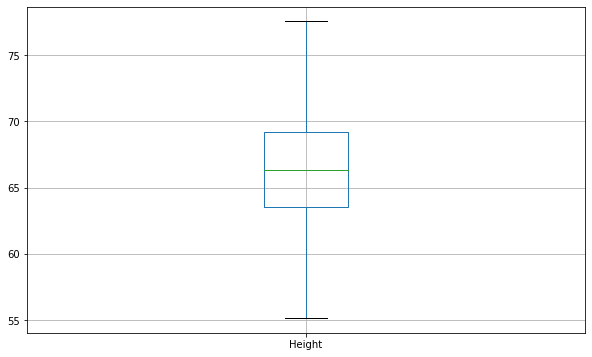

In [233]:
#Clean Height boxplot
plt.figure(figsize=(10, 6))
Clean_Height.boxplot(["Height"])
plt.show()

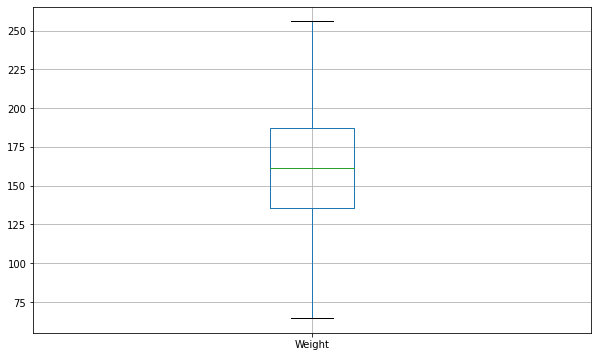

In [234]:
#Clean Weight boxplot
plt.figure(figsize=(10, 6))
Clean_Weight.boxplot(["Weight"])
plt.show()

Merging the clean data

In [252]:
#Using inner join so there's no null data
merged_data = Clean_Height.merge(Clean_Weight)
merged_data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9987,Female,66.172652,136.777454
9988,Female,67.067155,170.867906
9989,Female,63.867992,128.475319
9990,Female,69.034243,163.852461


In [245]:
#Checking null data count on clean datasets
merged_data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [251]:
#Clean datasets statistics
merged_data.describe()

,Height,Weight
count,9992.000000,9992.000000
mean,66.365006,161.422760
std,3.833980,32.019872
min,55.148557,68.982530
25%,63.509087,135.821269
50%,66.317827,161.197662
75%,69.169386,187.124646
max,77.547186,255.863326


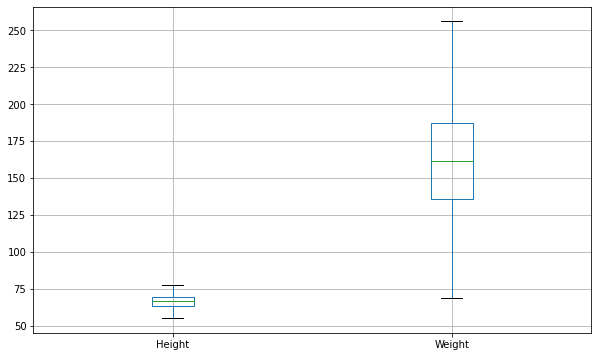

In [255]:
#Clean datasets boxplots
plt.figure(figsize=(10, 6))
merged_data.boxplot()
plt.show()

#Conclusion

In [268]:
#Substracting datasets before preprocessing with datasets after preprocessing
print(f"From {len(df)} data to {len(merged_data)} data and {len(df) - len(merged_data)} outliers data are removed after preprocessing using quartile method.")

From 10000 data to 9992 data and 8 outliers data are removed after preprocessing using quartile method.


#GitHub

https://github.com/miftahudinfaiz/BDDM